In [ ]:
# pip install NeuralForecast

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
X_df = pd.read_csv('/content/df_x.csv')
Y_df = pd.read_csv('/content/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...
57595,2018-02-20 22:45:00,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_df

,ds,unique_id,y
0,2016-07-01 00:00:00,OT,1.018032
1,2016-07-01 00:15:00,OT,0.980124
2,2016-07-01 00:30:00,OT,0.904223
3,2016-07-01 00:45:00,OT,0.885226
4,2016-07-01 01:00:00,OT,0.885226
...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325
57596,2018-02-20 23:00:00,OT,-1.581325
57597,2018-02-20 23:15:00,OT,-1.581325
57598,2018-02-20 23:30:00,OT,-1.562328


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:57504,:]
Y_test_df = Y_df.iloc[57504:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,57504,2018-02-20 00:00:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
1,57505,2018-02-20 00:15:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
2,57506,2018-02-20 00:30:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
3,57507,2018-02-20 00:45:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
4,57508,2018-02-20 01:00:00,OT,-1.277761,-0.456522,-0.333333,0.133333,-0.363014
...,...,...,...,...,...,...,...,...
91,57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
92,57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
93,57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
94,57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-20 00:00:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
1,2018-02-20 00:15:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
2,2018-02-20 00:30:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
3,2018-02-20 00:45:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
4,2018-02-20 01:00:00,OT,-1.277761,-0.456522,-0.333333,0.133333,-0.363014
...,...,...,...,...,...,...,...
91,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
92,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
93,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
94,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
horizon = 96
model = FEDformer(h=horizon, input_size=24,
               max_steps=30,
               )

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,-0.613585
OT,1,-1.116679
OT,2,-1.531901
OT,3,-1.511133
OT,4,-1.552401
...,...,...
OT,91,-1.328296
OT,92,-1.358806
OT,93,-1.384872


<Axes: xlabel='ds'>

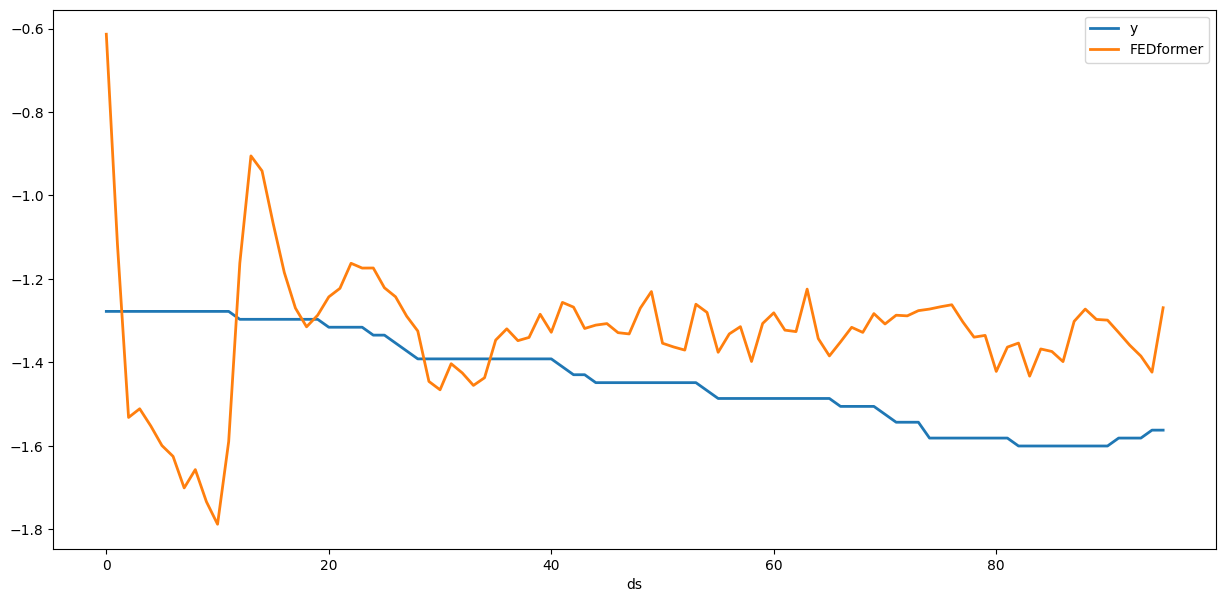

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,-0.613585
1,-1.116679
2,-1.531901
3,-1.511133
4,-1.552401
...,...
91,-1.328296
92,-1.358806
93,-1.384872


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.190
FEDformer MSE: 0.049


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:57408,:]
Y_test_df = Y_df.iloc[57408:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,57408,2018-02-19 00:00:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
1,57409,2018-02-19 00:15:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
2,57410,2018-02-19 00:30:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
3,57411,2018-02-19 00:45:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
4,57412,2018-02-19 01:00:00,OT,-1.429522,-0.456522,-0.500000,0.100000,-0.365753
...,...,...,...,...,...,...,...,...
187,57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
188,57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
189,57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
190,57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-19 00:00:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
1,2018-02-19 00:15:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
2,2018-02-19 00:30:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
3,2018-02-19 00:45:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
4,2018-02-19 01:00:00,OT,-1.429522,-0.456522,-0.500000,0.100000,-0.365753
...,...,...,...,...,...,...,...
187,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
188,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
189,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
190,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
horizon = 192
model = FEDformer(h=horizon, input_size=24,
               max_steps=30,
               )

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,-1.385643
OT,1,-1.651628
OT,2,-1.749524
OT,3,-1.834482
OT,4,-1.906794
...,...,...
OT,187,-1.376091
OT,188,-1.356128
OT,189,-1.348530


<Axes: xlabel='ds'>

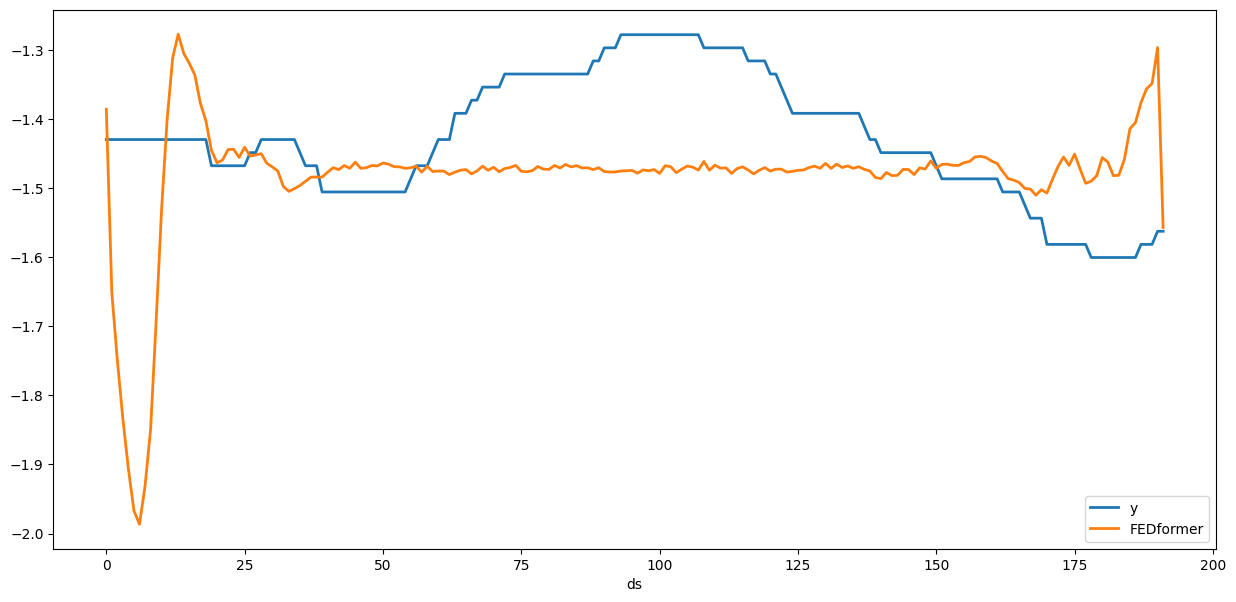

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,-1.385643
1,-1.651628
2,-1.749524
3,-1.834482
4,-1.906794
...,...
187,-1.376091
188,-1.356128
189,-1.348530


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.106
FEDformer MSE: 0.020


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:57264,:]
Y_test_df = Y_df.iloc[57264:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,57264,2018-02-17 12:00:00,OT,-0.860344,0.021739,0.333333,0.033333,-0.371233
1,57265,2018-02-17 12:15:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
2,57266,2018-02-17 12:30:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
3,57267,2018-02-17 12:45:00,OT,-0.765445,0.021739,0.333333,0.033333,-0.371233
4,57268,2018-02-17 13:00:00,OT,-0.708540,0.065217,0.333333,0.033333,-0.371233
...,...,...,...,...,...,...,...,...
331,57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
332,57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
333,57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
334,57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-17 12:00:00,OT,-0.860344,0.021739,0.333333,0.033333,-0.371233
1,2018-02-17 12:15:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
2,2018-02-17 12:30:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
3,2018-02-17 12:45:00,OT,-0.765445,0.021739,0.333333,0.033333,-0.371233
4,2018-02-17 13:00:00,OT,-0.708540,0.065217,0.333333,0.033333,-0.371233
...,...,...,...,...,...,...,...
331,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
332,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
333,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
334,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
horizon = 336
model = FEDformer(h=horizon, input_size=24,
               max_steps=15,
               )

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,-1.619776
OT,1,-0.709711
OT,2,-0.629191
OT,3,-0.597189
OT,4,-0.578576
...,...,...
OT,331,-1.891135
OT,332,-1.888061
OT,333,-1.885147


<Axes: xlabel='ds'>

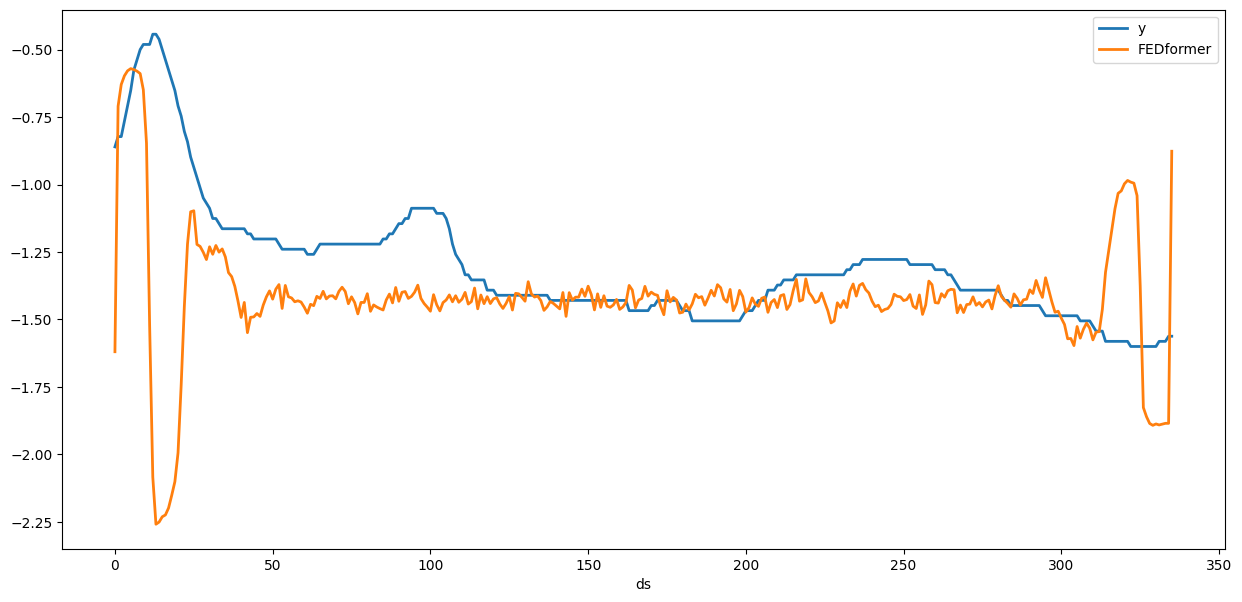

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,-1.619776
1,-0.709711
2,-0.629191
3,-0.597189
4,-0.578576
...,...
331,-1.891135
332,-1.888061
333,-1.885147


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'N-FEDformer MAE: {mae_FEDformer:.3f}')
print(f'N-FEDformer MSE: {mse_FEDformer:.3f}')

N-FEDformer MAE: 0.181
N-FEDformer MSE: 0.112


## Horizon 720

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:56880,:]
Y_test_df = Y_df.iloc[56880:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,56880,2018-02-13 12:00:00,OT,-0.689543,0.021739,-0.333333,-0.100000,-0.382192
1,56881,2018-02-13 12:15:00,OT,-0.632682,0.021739,-0.333333,-0.100000,-0.382192
2,56882,2018-02-13 12:30:00,OT,-0.613685,0.021739,-0.333333,-0.100000,-0.382192
3,56883,2018-02-13 12:45:00,OT,-0.575734,0.021739,-0.333333,-0.100000,-0.382192
4,56884,2018-02-13 13:00:00,OT,-0.518786,0.065217,-0.333333,-0.100000,-0.382192
...,...,...,...,...,...,...,...,...
715,57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
716,57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
717,57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
718,57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-13 12:00:00,OT,-0.689543,0.021739,-0.333333,-0.100000,-0.382192
1,2018-02-13 12:15:00,OT,-0.632682,0.021739,-0.333333,-0.100000,-0.382192
2,2018-02-13 12:30:00,OT,-0.613685,0.021739,-0.333333,-0.100000,-0.382192
3,2018-02-13 12:45:00,OT,-0.575734,0.021739,-0.333333,-0.100000,-0.382192
4,2018-02-13 13:00:00,OT,-0.518786,0.065217,-0.333333,-0.100000,-0.382192
...,...,...,...,...,...,...,...
715,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
716,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
717,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
718,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
horizon = 720
model = FEDformer(h=horizon, input_size=24,
               max_steps=12,
               )

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,-1.868737
OT,1,-0.903955
OT,2,-0.849830
OT,3,-0.813622
OT,4,-0.795137
...,...,...
OT,715,-2.235319
OT,716,-2.226679
OT,717,-2.218535


<Axes: xlabel='ds'>

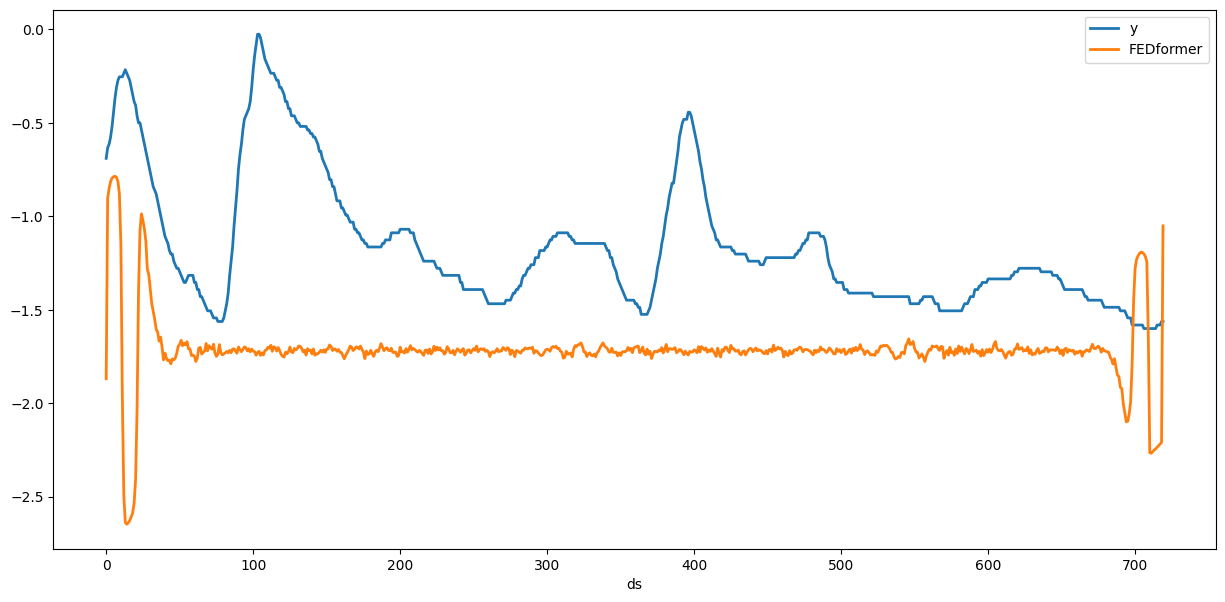

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,-1.868737
1,-0.903955
2,-0.849830
3,-0.813622
4,-0.795137
...,...
715,-2.235319
716,-2.226679
717,-2.218535


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.561
FEDformer MSE: 0.451
